In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# CSC Data

In [2]:
#Loading Data
df_csc = pd.read_excel("clinical data.xlsx",'CSC Data')
df_csc.head()

,30 um CSC (mC/cm^2),50 um CSC (mC/cm^2),100 um CSC (mC/cm^2),150 um CSC (mC/cm^2),200 um CSC (mC/cm^2)
0,20.3,22.3,25.8,30.7,40.3
1,21.4,21.8,28.6,33.5,45.8
2,17.8,23.7,30.8,29.9,48.9
3,19.5,19.9,27.5,34.2,47.8
4,18.2,26.7,22.5,36.8,50.3


Text(0.5, 1.0, 'Mean Charge Storage Capacity per Grain Size')

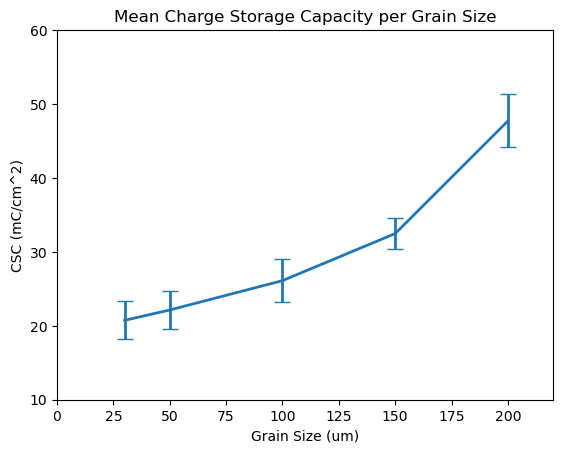

In [3]:
#Descriptive Statistics on CSC Data
plt.errorbar([30,50,100,150,200],df_csc.mean(), yerr = df_csc.std(), linewidth = 2, capsize = 6)
plt.axis([0,220,10,60])
plt.xlabel('Grain Size (um)')
plt.ylabel('CSC (mC/cm^2)')
plt.title('Mean Charge Storage Capacity per Grain Size')

array([[<Axes: title={'center': '30 um CSC (mC/cm^2)'}>,
        <Axes: title={'center': '50 um CSC (mC/cm^2)'}>],
       [<Axes: title={'center': '100 um CSC (mC/cm^2)'}>,
        <Axes: title={'center': '150 um CSC (mC/cm^2)'}>],
       [<Axes: title={'center': '200 um CSC (mC/cm^2)'}>, <Axes: >]],
      dtype=object)

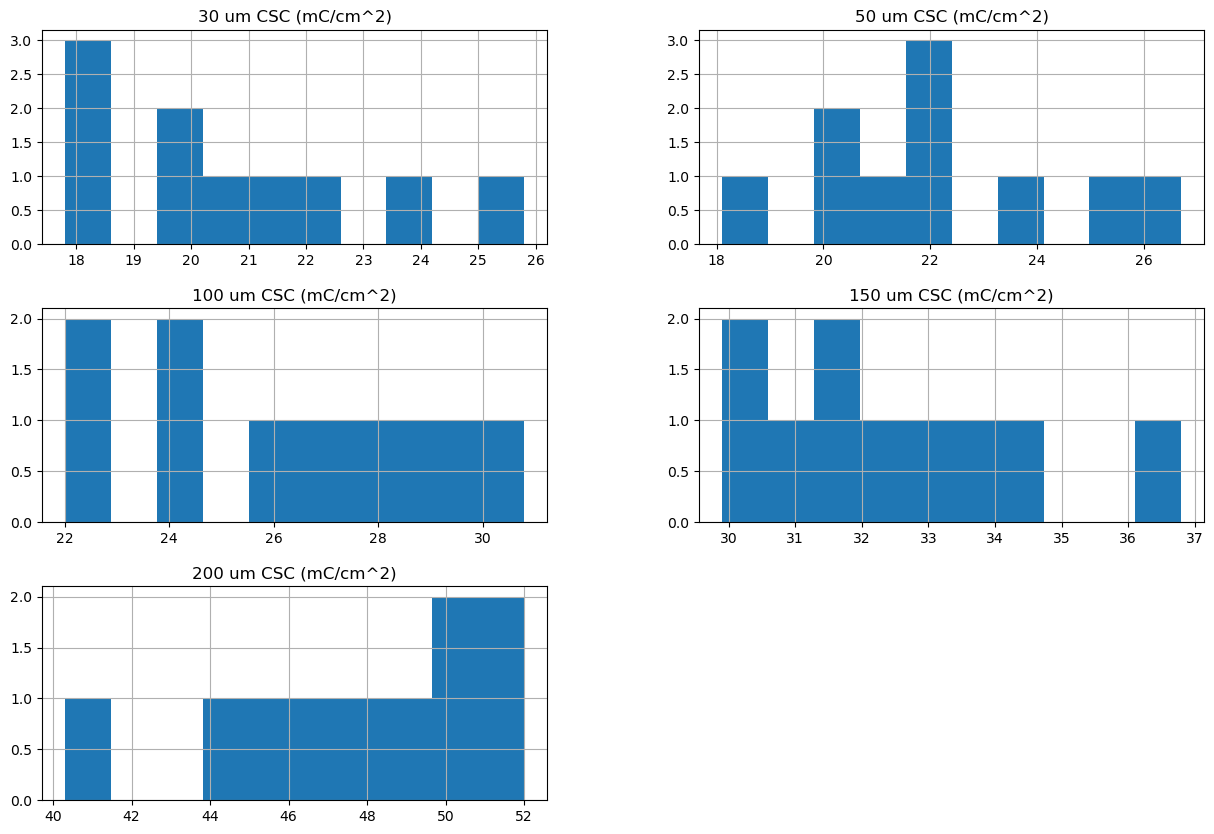

In [4]:
#Normality of CSC Data
df_csc.hist(figsize = (15,10))

In [5]:
print('Shapiro Tests:\n')
print('30 um results:',stats.shapiro(df_csc['30 um CSC (mC/cm^2)']))
print('50 um results:',stats.shapiro(df_csc['50 um CSC (mC/cm^2)']))
print('100 um results:',stats.shapiro(df_csc['100 um CSC (mC/cm^2)']))
print('150 um results:',stats.shapiro(df_csc['150 um CSC (mC/cm^2)']))
print('200 um results:',stats.shapiro(df_csc['200 um CSC (mC/cm^2)']))

Shapiro Tests:

30 um results: ShapiroResult(statistic=0.9328032026562041, pvalue=0.476024092422507)
50 um results: ShapiroResult(statistic=0.9760439838911069, pvalue=0.9405473935027514)
100 um results: ShapiroResult(statistic=0.9655971797048837, pvalue=0.8472958347825618)
150 um results: ShapiroResult(statistic=0.9451249190117598, pvalue=0.6113102692071415)
200 um results: ShapiroResult(statistic=0.9362101152731511, pvalue=0.5116626187473816)


In [6]:
#General ANOVA (Normal one because our data is normally distributed)
stats.f_oneway(df_csc['30 um CSC (mC/cm^2)'],
              df_csc['50 um CSC (mC/cm^2)'],
              df_csc['100 um CSC (mC/cm^2)'],
              df_csc['150 um CSC (mC/cm^2)'],
              df_csc['200 um CSC (mC/cm^2)'])

F_onewayResult(statistic=154.68559817778555, pvalue=1.1071633494384018e-25)

In [7]:
#Post-hoc test - Bonferroni Correction
print('Corrected alpha: ', 0.05/5)

print('30 to 50 um:', stats.ttest_ind(df_csc['30 um CSC (mC/cm^2)'],df_csc['50 um CSC (mC/cm^2)']))
print('30 to 100 um:', stats.ttest_ind(df_csc['30 um CSC (mC/cm^2)'],df_csc['100 um CSC (mC/cm^2)']))
print('50 to 100 um:', stats.ttest_ind(df_csc['50 um CSC (mC/cm^2)'],df_csc['100 um CSC (mC/cm^2)']))
print('100 to 150 um:', stats.ttest_ind(df_csc['100 um CSC (mC/cm^2)'],df_csc['150 um CSC (mC/cm^2)']))
print('150 to 200 um:', stats.ttest_ind(df_csc['150 um CSC (mC/cm^2)'],df_csc['200 um CSC (mC/cm^2)']))

Corrected alpha:  0.01
30 to 50 um: TtestResult(statistic=-1.220146858077532, pvalue=0.23815446827589085, df=18.0)
30 to 100 um: TtestResult(statistic=-4.335205691273846, pvalue=0.00039874090748587927, df=18.0)
50 to 100 um: TtestResult(statistic=-3.2115027875604283, pvalue=0.004838547495565712, df=18.0)
100 to 150 um: TtestResult(statistic=-5.597274462202518, pvalue=2.597690403472827e-05, df=18.0)
150 to 200 um: TtestResult(statistic=-11.653299469182894, pvalue=8.078442433116009e-10, df=18.0)


In [8]:
x = stats.ttest_ind(df_csc['30 um CSC (mC/cm^2)'],df_csc['50 um CSC (mC/cm^2)'])
x[1]

0.23815446827589085

So we can conclude that the CSC from all devices except for the 30 to 50 um devices are significantly different from each other.

# Clinical Data

In [9]:
df_cd = pd.read_excel("clinical data.xlsx", 'Clinical Data')
df_cd.head()

,Sex,Device Type,RR Before Stim (breaths/min),RR After Stim (breaths/min)
0,M,30 um,12.4,13.2
1,M,30 um,14.6,14.5
2,M,30 um,13.8,15.3
3,F,30 um,20.4,20.5
4,M,30 um,19.5,19.3


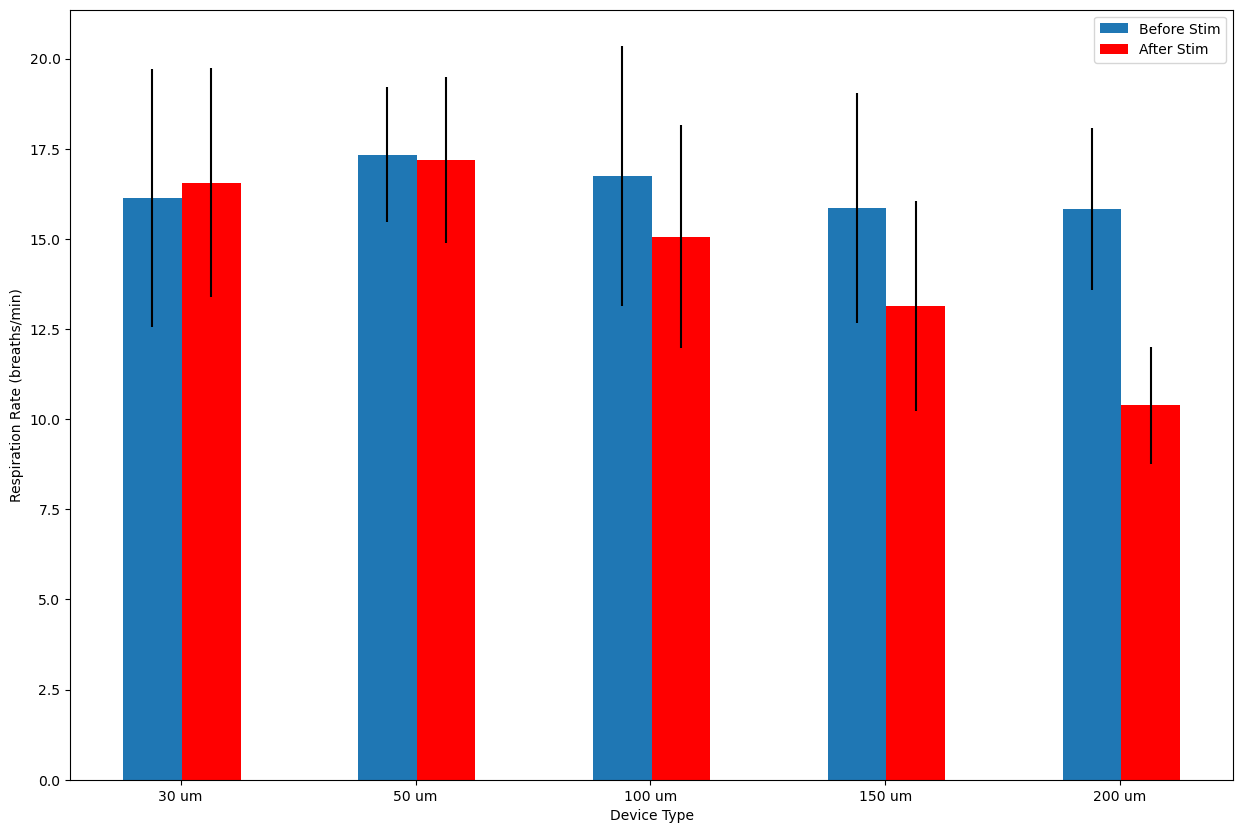

In [10]:
cd_means_before = [df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '30 um'].mean(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '50 um'].mean(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '100 um'].mean(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '150 um'].mean(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '200 um'].mean()]

cd_std_before = [df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '30 um'].std(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '50 um'].std(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '100 um'].std(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '150 um'].std(),
           df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '200 um'].std()]

cd_means_after = [df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '30 um'].mean(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '50 um'].mean(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '100 um'].mean(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '150 um'].mean(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '200 um'].mean()]

cd_std_after = [df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '30 um'].std(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '50 um'].std(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '100 um'].std(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '150 um'].std(),
           df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '200 um'].std()]

plt.figure(figsize = (15,10))
plt.bar([1,2,3,4,5],cd_means_before, yerr = cd_std_before, width = 0.25, align = "center")
plt.bar([1.25,2.25,3.25,4.25,5.25],cd_means_after, yerr = cd_std_after, width = 0.25, align = "center", color = "red")
plt.xticks([1.12,2.12,3.12,4.12,5.12],['30 um', '50 um', '100 um', '150 um', '200 um'])
plt.xlabel('Device Type')
plt.ylabel('Respiration Rate (breaths/min)')
plt.legend(['Before Stim','After Stim'])

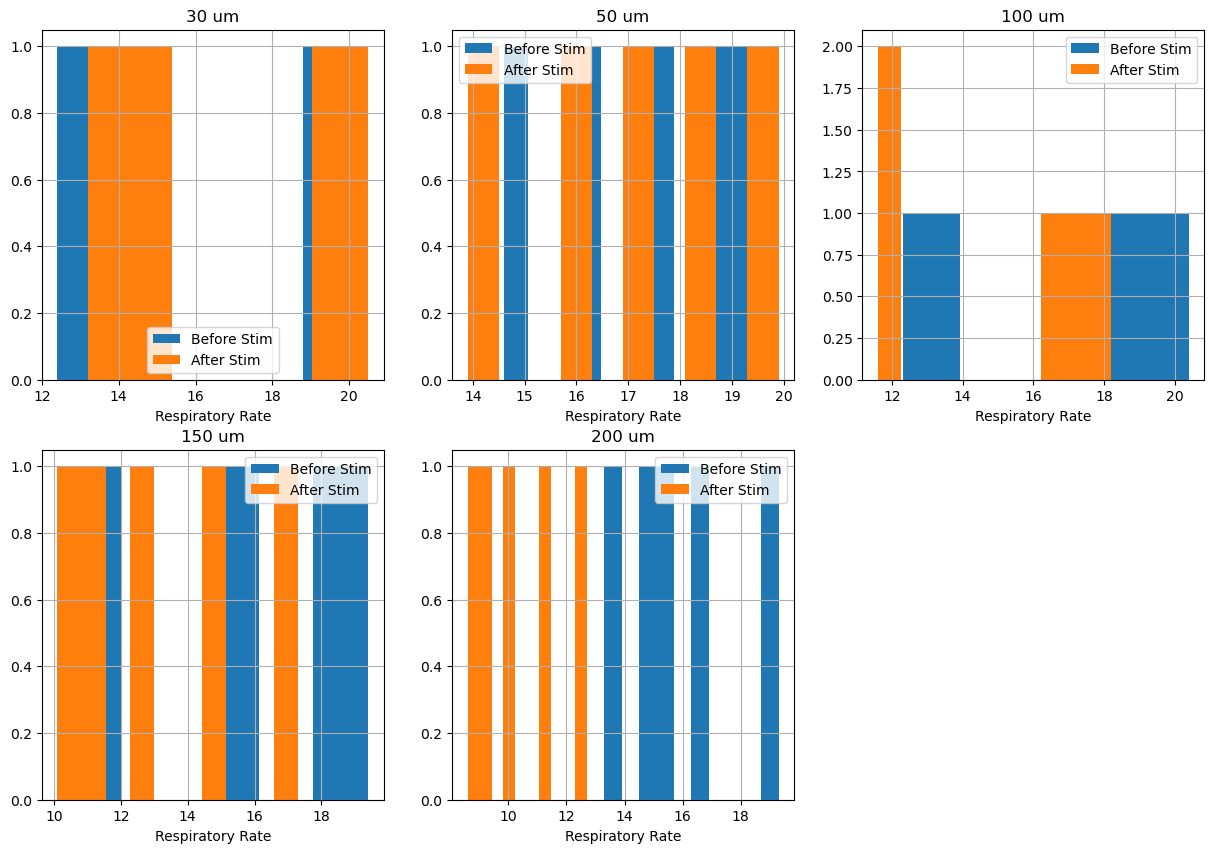

In [11]:
#Before and after stim histograms

plt.figure(figsize = (15,10))
plt.subplot(231)
df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '30 um'].hist()
df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '30 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('30 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(232)
df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '50 um'].hist()
df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '50 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('50 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(233)
df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '100 um'].hist()
df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '100 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('100 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(234)
df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '150 um'].hist()
df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '150 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('150 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(235)
df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '200 um'].hist()
df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '200 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('200 um')
plt.legend(['Before Stim', 'After Stim'])

Samples are not independent! (Taken from same people) So ANOVA is not appropriate. Must use paired t-tests.

In [12]:
print('30 um results:',stats.ttest_rel(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '30 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '30 um']))

print('50 um results:',stats.ttest_rel(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '50 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '50 um']))

print('100 um results:',stats.ttest_rel(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '100 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '100 um']))

print('150 um results:',stats.ttest_rel(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '150 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '150 um']))

print('200 um results:',stats.ttest_rel(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '200 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '200 um']))

30 um results: TtestResult(statistic=-1.3061378684993596, pvalue=0.2615508441830743, df=4)
50 um results: TtestResult(statistic=0.7112867591590214, pvalue=0.5161869943521875, df=4)
100 um results: TtestResult(statistic=3.6539011176389904, pvalue=0.021696654900609725, df=4)
150 um results: TtestResult(statistic=5.221123695675253, pvalue=0.0064225312413258295, df=4)
200 um results: TtestResult(statistic=17.477034110840293, pvalue=6.29303863146967e-05, df=4)


Since we can't prove normality with such a small sample size we should use a Wilcoxon test.

In [13]:
print('30 um results:',stats.wilcoxon(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '30 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '30 um']))

print('50 um results:',stats.wilcoxon(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '50 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '50 um']))

print('100 um results:',stats.wilcoxon(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '100 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '100 um']))

print('150 um results:',stats.wilcoxon(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '150 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '150 um']))

print('200 um results:',stats.wilcoxon(df_cd['RR Before Stim (breaths/min)'][df_cd['Device Type'] == '200 um'],
              df_cd['RR After Stim (breaths/min)'][df_cd['Device Type'] == '200 um']))

30 um results: WilcoxonResult(statistic=4.0, pvalue=0.4375)
50 um results: WilcoxonResult(statistic=3.0, pvalue=0.4652088184521418)
100 um results: WilcoxonResult(statistic=0.0, pvalue=0.0625)
150 um results: WilcoxonResult(statistic=0.0, pvalue=0.0625)
200 um results: WilcoxonResult(statistic=0.0, pvalue=0.0625)


/nix/store/1nznx3yrv1lz0r1z49mwxxqjsfzikdrw-python3.12-scipy-1.14.0/lib/python3.12/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


Notice the Wilcoxon test a) needs more samples, and b) shows significance for the same three parameters as before.

The results of these tests demonstrate that the 100, 150, and 200 um devices all produced statistically significant decreases in the respiratory rate of patients after stimulation. 

Some key aspects that could be improved on are controls, increased sample size, and measurement of more variables to further aid in choosing a single best device type.